In [1]:
import os
import shutil
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dir_list = ['boron-B',
 'calcium-Ca',
# 'healthy',
 'iron-Fe',
 'magnesium-Mg',
 'manganese-Mn',
 'more-deficiencies',
 'nitrogen-N',
 'phosphorus-P',
 'potasium-K']

for classes in dir_list:
    
    kaggle_input_dir = '/kaggle/input/coleaf/CoLeaf DATASET/' + classes

    temp_dir = '/kaggle/working/temp/' + classes

    if not os.path.exists(temp_dir):
        os.makedirs(temp_dir)

    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

    generated_images = datagen.flow_from_directory(
        kaggle_input_dir,
        save_to_dir=temp_dir,
        batch_size = 1,
        save_prefix=classes,
        save_format='jpg'
    )

    num_images = 300
    for i in range(num_images):
        generated_image = next(generated_images)


    shutil.make_archive('/kaggle/temp/' + classes, 'zip', temp_dir)

2024-05-21 07:15:48.704141: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 07:15:48.704226: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 07:15:48.827876: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 101 images belonging to 1 classes.
Found 162 images belonging to 1 classes.
Found 65 images belonging to 1 classes.
Found 79 images belonging to 1 classes.
Found 83 images belonging to 1 classes.
Found 104 images belonging to 1 classes.
Found 64 images belonging to 1 classes.
Found 246 images belonging to 1 classes.
Found 96 images belonging to 1 classes.


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications import VGG16
import seaborn as sns
import PIL

In [3]:
dataset = '/kaggle/working/temp'

In [5]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [6]:
data = datagen.flow_from_directory(dataset, target_size=(224,224), batch_size = 4500)

Found 2700 images belonging to 9 classes.


In [7]:
images, labels = next(data)

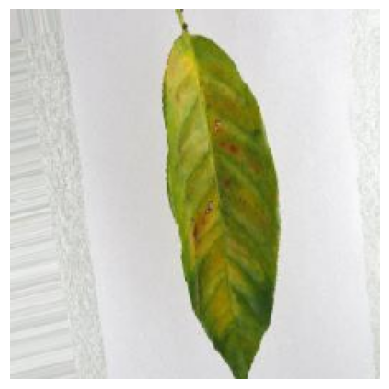

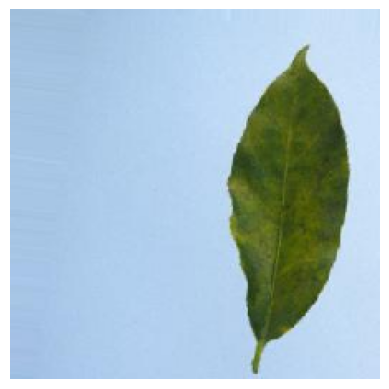

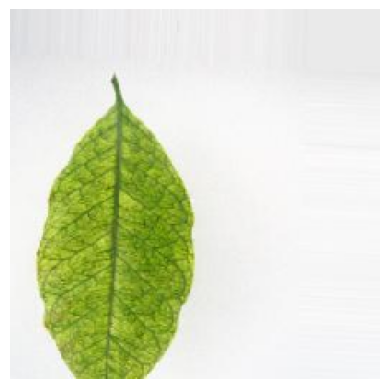

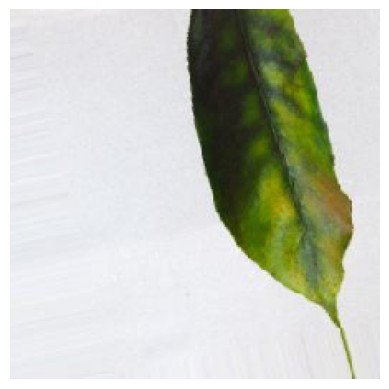

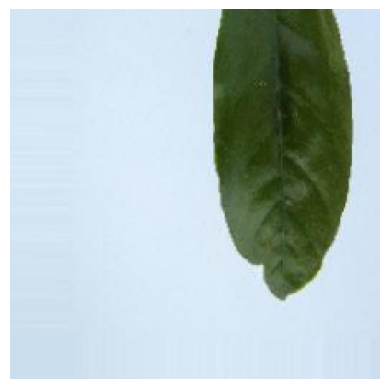

In [9]:
for i in range(5):
    plt.imshow(images[i], cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.axis('off')  # Hide axis
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# **MobileNetV2**

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score

# Constants
IMAGE_SIZE = 224

# Load the MobileNetV2 model, excluding the top layers
base_model = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), weights='imagenet', include_top=False)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(9, activation='softmax')(x)  # Assuming 9 classes

# Define the complete model
model_mn = Model(inputs=base_model.input, outputs=x)

# Compile the model
model_mn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy', Precision(), Recall()])

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Assuming x_train and y_train are defined and preprocessed correctly
history = model_mn.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=20,
    verbose=1,
    callbacks=[early_stopping]
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/200
 5/87 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.1407 - loss: 2.6234 - precision: 0.1750 - recall: 0.0228

I0000 00:00:1716276526.342943     191 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716276526.375860     191 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.2880 - loss: 2.0078 - precision: 0.5456 - recall: 0.0767

W0000 00:00:1716276532.905692     191 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716276537.316504     189 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


87/87 ━━━━━━━━━━━━━━━━━━━━ 29s 187ms/step - accuracy: 0.2892 - loss: 2.0042 - precision: 0.5474 - recall: 0.0775 - val_accuracy: 0.5556 - val_loss: 1.2930 - val_precision: 0.7453 - val_recall: 0.2778
Epoch 2/200
 4/87 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5344 - loss: 1.1491 - precision: 0.6796 - recall: 0.2771

W0000 00:00:1716276542.479022     189 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5521 - loss: 1.2237 - precision: 0.7523 - recall: 0.3260 - val_accuracy: 0.6019 - val_loss: 1.1529 - val_precision: 0.8235 - val_recall: 0.3889
Epoch 3/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6441 - loss: 1.0261 - precision: 0.8202 - recall: 0.4246 - val_accuracy: 0.6181 - val_loss: 1.0753 - val_precision: 0.8000 - val_recall: 0.4352
Epoch 4/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6845 - loss: 0.9015 - precision: 0.8554 - recall: 0.5165 - val_accuracy: 0.6366 - val_loss: 1.0218 - val_precision: 0.7992 - val_recall: 0.4699
Epoch 5/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7369 - loss: 0.8211 - precision: 0.8729 - recall: 0.5619 - val_accuracy: 0.6412 - val_loss: 0.9927 - val_precision: 0.8044 - val_recall: 0.5046
Epoch 6/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7255 - loss: 0.7630 - precision: 0.8732 - recall: 0.5925 - val_accuracy: 0.6551 - val_loss: 0.9649 - val_p

In [17]:
# Evaluate the model
loss, accuracy, precision, recall = model_mn.evaluate(x_test, y_test)
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6897 - loss: 0.8849 - precision: 0.7515 - recall: 0.5889
Loss: 0.8419352769851685
Accuracy: 0.6888889074325562
Precision: 0.7735849022865295
Recall: 0.6074073910713196
F1 Score: 0.680497913753766


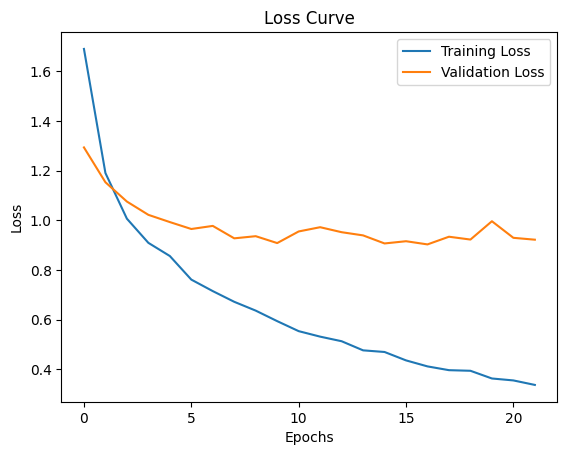

In [20]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **ResNet152V2**

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score

IMAGE_SIZE = 224
base_model = ResNet152V2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), weights='imagenet', include_top=False)

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(9, activation='softmax')(x)
model_rn = Model(inputs=base_model.input, outputs=x)

# Compile the model
model_rn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Fit the model
history = model_rn.fit(x_train, y_train,
                       validation_split=0.2,
                       epochs=200,
                       batch_size=50,
                       verbose=1,
                       callbacks=[early_stopping])



234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/200


W0000 00:00:1716277066.854429     190 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 716ms/step - accuracy: 0.2171 - loss: 2.2165 - precision_1: 0.3477 - recall_1: 0.0268

W0000 00:00:1716277091.319871     188 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716277102.569124     191 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


35/35 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.2195 - loss: 2.2090 - precision_1: 0.3542 - recall_1: 0.0280 - val_accuracy: 0.4236 - val_loss: 1.5676 - val_precision_1: 0.7736 - val_recall_1: 0.1898
Epoch 2/200


W0000 00:00:1716277118.463830     188 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 353ms/step - accuracy: 0.4916 - loss: 1.4095 - precision_1: 0.7930 - recall_1: 0.2149 - val_accuracy: 0.5440 - val_loss: 1.3161 - val_precision_1: 0.8417 - val_recall_1: 0.2708
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 363ms/step - accuracy: 0.6007 - loss: 1.1826 - precision_1: 0.8001 - recall_1: 0.3317 - val_accuracy: 0.5370 - val_loss: 1.2856 - val_precision_1: 0.8084 - val_recall_1: 0.3125
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 360ms/step - accuracy: 0.6528 - loss: 1.0559 - precision_1: 0.8327 - recall_1: 0.3985 - val_accuracy: 0.5602 - val_loss: 1.2179 - val_precision_1: 0.7968 - val_recall_1: 0.3449
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 347ms/step - accuracy: 0.6879 - loss: 0.9563 - precision_1: 0.8600 - recall_1: 0.4364 - val_accuracy: 0.5810 - val_loss: 1.1570 - val_precision_1: 0.8155 - val_recall_1: 0.3889
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 349ms/step - accuracy: 0.7099 - loss: 0.9028 - precision_1: 0.8826 - recall_1: 0.4740 - v

In [23]:
# Evaluate the model
loss, accuracy, precision, recall = model_rn.evaluate(x_test, y_test)
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.6351 - loss: 1.0461 - precision_1: 0.7227 - recall_1: 0.5327
Loss: 1.0801033973693848
Accuracy: 0.6277777552604675
Precision: 0.700507640838623
Recall: 0.5111111402511597
F1 Score: 0.5910064529399984


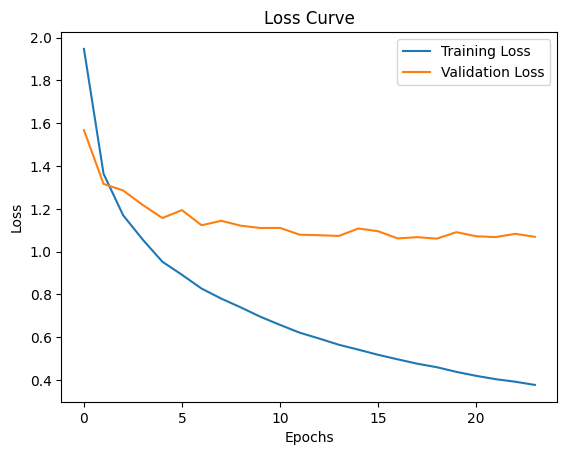

In [24]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()